In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [66]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Pre-destab profiles

In [36]:
list_D=[0.005, 0.01, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4]

In [45]:
prof_destab_9={}
prof_destab_1={}


for D in list_D:
    try:
        prof_destab_9[D]=pd.read_csv('t_destab_D_avg_m/D%s/f_profiles.dat'%str(D), sep=' ', names=np.arange(600), index_col=False)
    except: 
        print(9,D)
        
for D in list_D:
    try:
        prof_destab_1[D]=pd.read_csv('../1nei/t_destab_D_v2/D%s/f_profiles.dat'%str(D), sep=' ', names=np.arange(200), index_col=False)

    except: 
        print(1,D)

9 0.38
9 0.4
1 0.005
1 0.01
1 0.02
1 0.04
1 0.08
1 0.12
1 0.14
1 0.18
1 0.22
1 0.24
1 0.28
1 0.32
1 0.34
1 0.36
1 0.38
1 0.4


In [47]:
list(prof_destab_1)

[0.06, 0.1, 0.16, 0.2, 0.26, 0.3]

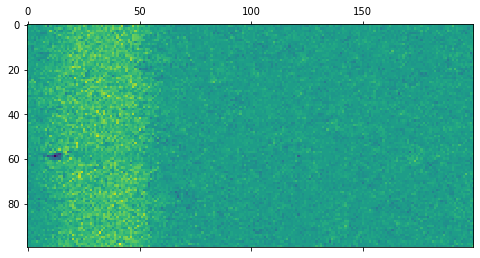

In [62]:
k=1
D=0.3
plt.matshow(prof_destab_1[D].values[k*100:(k+1)*100,:])

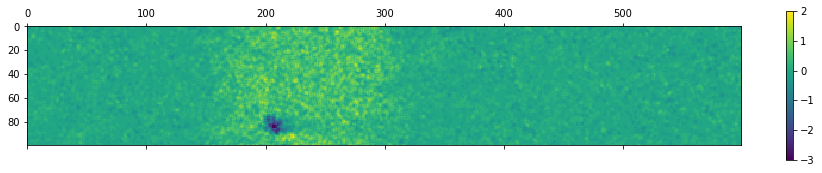

In [75]:
k=1
D=0.3
plt.matshow(prof_destab_9[D].values[k*100:(k+1)*100,:])
plt.colorbar()

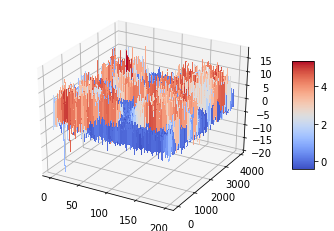

In [73]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, prof_destab_1[D].shape[1])
Y = np.arange(0, prof_destab_1[D].shape[0])
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, prof_destab_1[D].values, cmap=cm.coolwarm, linewidth=0, antialiased=False)


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [34]:
k=0
D=0.3
plt.matshow(prof_destab_1[D].values[k*100:(k+1)*100,:])

NameError: name 'prof_destab_1' is not defined

In [125]:
t_destab_1[D]

array([[ 585980.62],
       [ 782013.36],
       [1458116.2 ],
       [ 547253.45],
       [  98173.69],
       [   4545.18],
       [   8218.54],
       [1106174.26],
       [1434196.01],
       [1483953.25],
       [1067983.53],
       [ 185254.83],
       [1156535.31],
       [ 357989.35],
       [1663735.39],
       [ 564431.47],
       [  89521.43],
       [ 276303.21],
       [ 222284.97],
       [ 726704.89],
       [ 178225.68],
       [ 429373.75],
       [ 279762.89],
       [ 116234.28],
       [ 417495.32],
       [ 375950.45],
       [ 830693.44],
       [ 184915.8 ],
       [ 227436.88],
       [  26521.59],
       [ 208806.68],
       [  11729.41],
       [ 255899.95],
       [ 884291.  ],
       [  54748.77],
       [ 352170.74],
       [1800641.15],
       [1831087.32]])

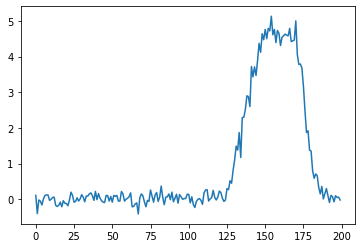

In [130]:
plt.plot(np.mean(prof_destab_1[D].values[k*100:(k+1)*100,:], axis=0))

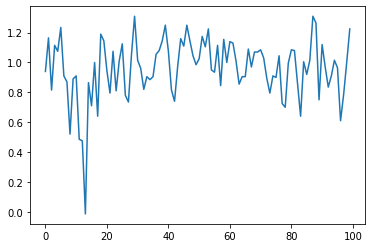

In [131]:
plt.plot(np.mean(prof_destab_1[D].values[k*100:(k+1)*100,:], axis=1))

In [132]:
np.argmin(np.mean(prof_destab_1[D].values[k*100:(k+1)*100,:], axis=1))

13

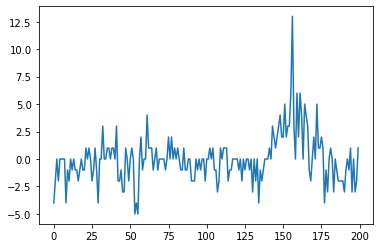

In [140]:
plt.plot(prof_destab_1[D].values[k*100+13])
#plt.plot(prof_destab_1[D].values[k*100+30])

In [137]:
np.sum(prof_destab_1[D].values[k*100+13])

-3.0

# Destab times 

In [26]:
list_D=[0.005, 0.01, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4]

In [25]:
#list_D=[0.        , 0.03, 0.06, 0.1       , 0.13,
 #      0.16, 0.2       , 0.23, 0.26, 0.3       ]

IndentationError: unexpected indent (<ipython-input-25-e8e36e5acf74>, line 2)

In [27]:
t_destab_9={}
mean_t_9=[]
std_t_9=[]

t_destab_1={}
mean_t_1=[]
std_t_1=[]


for D in list_D:
    try:
        t_destab_9[D]=np.loadtxt('t_destab_D_avg_m/D%s/f_td.dat'%str(D))
        mean_t_9.append(np.mean(t_destab_9[D]))
        std_t_9.append(np.std(t_destab_9[D]))
        print(D, t_destab_9[D].shape[0])
    except: 
        print(9,D)
        
for D in list_D:
    try:
        t_destab_1[D]=pd.read_csv('../1nei/t_destab_D_v2/D%s/f_td.dat'%str(D)).values
        mean_t_1.append(np.mean(t_destab_1[D]))
        std_t_1.append(np.std(t_destab_1[D]))
    except: 
        mean_t_1.append(np.nan)
        std_t_1.append(np.nan)

        print(1,D)

0.005 50
0.01 50
0.02 50
0.04 50
0.06 50
0.08 50
0.1 50
0.12 50
0.14 50
0.16 50
0.18 50
0.2 0
0.22 18
0.28 12
0.3 4
0.32 2
0.34 2
0.36 0
9 0.38
9 0.4
1 0.005
1 0.01
1 0.02
1 0.04
1 0.08
1 0.12
1 0.14
1 0.18
1 0.22
1 0.28
1 0.32
1 0.34
1 0.36
1 0.38
1 0.4


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "t_destab_D_avg_m/D0.2/f_td.dat"
  if sys.path[0] == '':
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWa

critère + strict pour D=0.1 et 0.3 -> différence ?

No handles with labels found to put in legend.


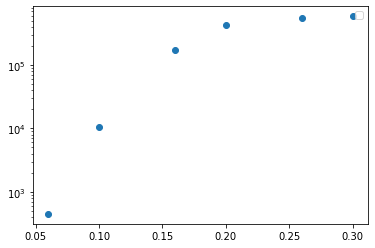

In [15]:
#plt.errorbar(list_D, mean_t_9, yerr=3*np.array(std_t_9)/np.sqrt([t_destab_9[D].shape[0] if t_destab_9[D].shape!=() else 1 for D in list_D]), fmt='o', label='9 boxes')
#plt.errorbar(list(t_destab_1), mean_t_1[:len(list(t_destab_1))], yerr=3*np.array(std_t_1[:len(list(t_destab_1))])/np.sqrt([t_destab_1[tD].shape[0] if t_destab_1[tD].shape!=() else 1 for tD in t_destab_1]), fmt='o', label='1 box')

plt.plot(list_D, mean_t_1, 'o')
plt.legend()
plt.yscale('log')


absD=np.linspace(0.005, 0.22, 100)

#plt.plot(absD, 80*np.exp(45*absD))

Text(0, 0.5, '$\\langle \\tau \\rangle$')

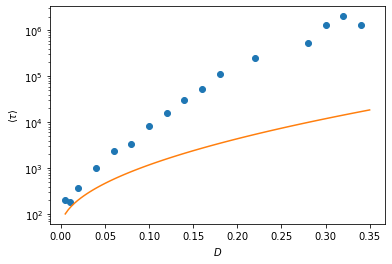

In [109]:
#plt.errorbar(list(t_destab_9), mean_t_9, yerr=3*np.array(std_t_9)/np.sqrt([t_destab_9[tD].shape[0] if t_destab_9[tD].shape!=() else 1 for tD in t_destab_9]), fmt='o', label='9 boxes')
#plt.errorbar(list(t_destab_1), mean_t_1[:len(list(t_destab_1))], yerr=3*np.array(std_t_1[:len(list(t_destab_1))])/np.sqrt([t_destab_1[tD].shape[0] if t_destab_1[tD].shape!=() else 1 for tD in t_destab_1]), fmt='o', label='1 box')

plt.semilogy(list(t_destab_9), mean_t_9, 'o')
#plt.yscale('log')


absD=np.linspace(0.005, 0.35, 100)
plt.plot(absD, 50*np.exp(10*np.sqrt(absD)))
#plt.plot(absD, 100*np.exp(21*absD**(0.7)))

plt.xlabel(r'$D$')
plt.ylabel(r'$\langle \tau \rangle$')

In [23]:
D=0.26
t_destab_9[D]

array(39545.64)

In [20]:
D=0.3
sns.distplot(t_destab_1[0.22])
plt.yscale('log')

KeyError: 0.22

In [21]:
absD=np.linspace(0.005, 0.2, 100)
plt.semilogy(absD, np.exp((fitLogi(absD, L=2.4, k=50, x0=0.1, t0=0))))

NameError: name 'fitLogi' is not defined

In [600]:
def Logi(x, L, k, x0, t0):
    #print(x, L, k, x0)
    return(L/(1+np.exp(-k*(x-x0))+t0))

In [640]:
def fitLogi(x, L, k, x0, t0):
    #print(x, L, k, x0)
    return(t0+np.exp(L/(1+np.exp(-k*(x-x0)))))

In [472]:
from scipy.optimize import curve_fit

In [604]:
mean_t_1=np.array(mean_t_1)
list_D=np.array(list_D)

In [622]:
popt, pcov = curve_fit(fitLogi, list_D[~np.isnan(mean_t_1)], mean_t_1[~np.isnan(mean_t_1)], p0=[2.4, 50, 0.1, 0])

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [623]:
popt

array([ 7.4733897 ,  2.75496439, -0.08144689, -0.88198435])

In [531]:
mean_t_1[~np.isnan(mean_t_1)]

array([8.95586000e+01, 9.55958000e+01, 1.10073800e+02, 1.92737000e+02,
       5.12698200e+02, 2.96357240e+03, 1.18470874e+04, 5.11576988e+04,
       1.16891264e+05, 1.68298985e+05, 1.83759147e+05])

In [533]:
 list_D[~np.isnan(mean_t_1)]

array([0.005, 0.01 , 0.02 , 0.04 , 0.06 , 0.08 , 0.1  , 0.12 , 0.14 ,
       0.16 , 0.18 ])